## Set working directory and output directory

In [1]:
import os
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [2]:
os.chdir(os.path.dirname(working_dir))

In [3]:
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery


In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path)

This version already exists, create a new version if you are working on a new version


<hr>

# Data distribution visualisation

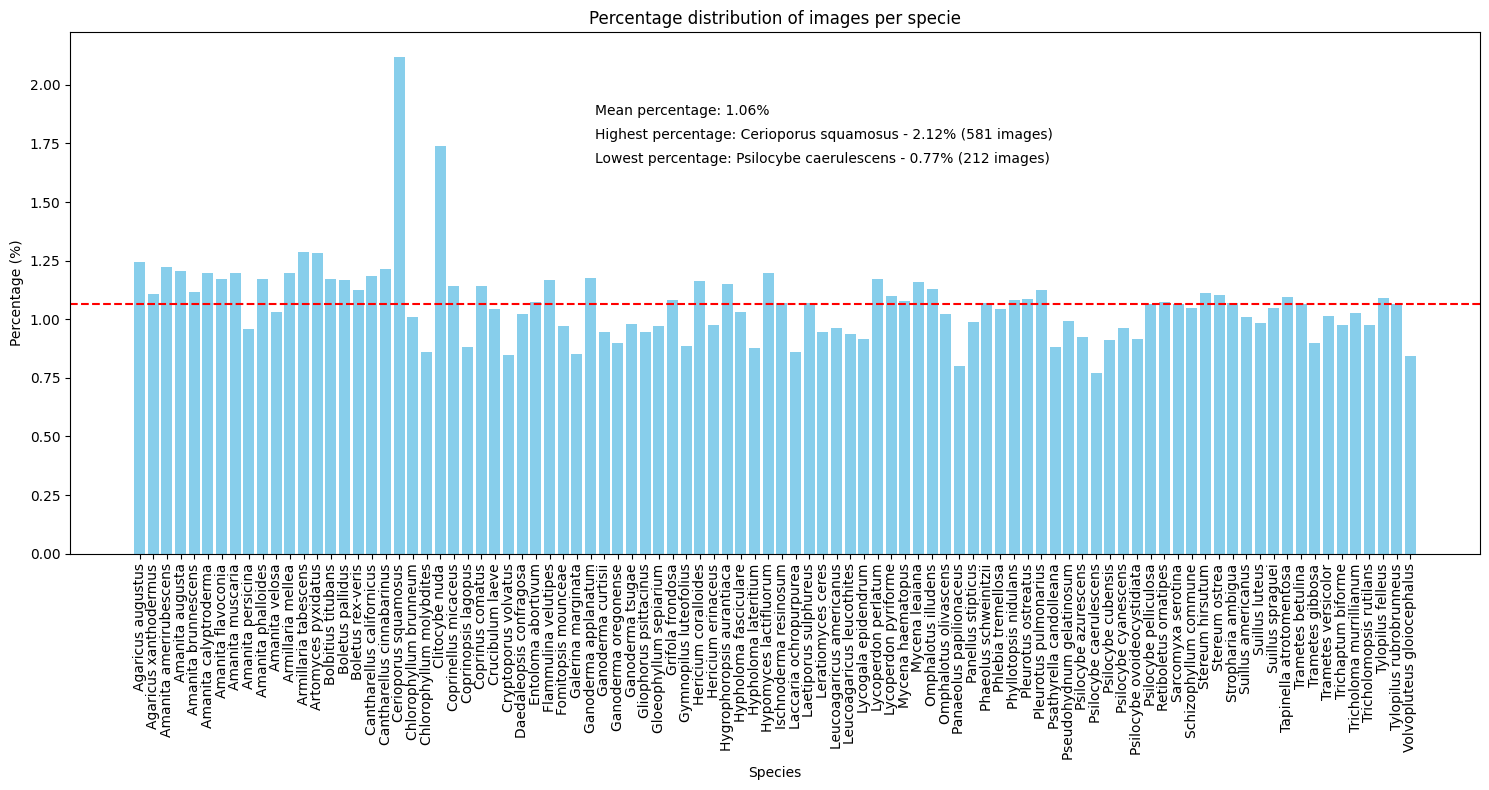

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the image folders
image_dirs = 'input/dataset/raw/MO_94'

# Creates a list that collects images per specie
images_per_specie = {}
for species in os.listdir(image_dirs):
    species_path = os.path.join(image_dirs, species)
    if os.path.isdir(species_path):
        images_per_specie[species] = len([img for img in os.listdir(species_path) if img.endswith(('.png', 'jpg', 'jpeg'))])
        

# Convert this list to a dataframe
df = pd.DataFrame(list(images_per_specie.items()), columns=['Species', 'Count'])

# Calculate the percentage of images per specie
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Calculate the highest, the lowest and mean value of the distribution
highest = df.loc[df['Percentage'].idxmax()]
lowest = df.loc[df['Percentage'].idxmin()]
mean_percentage = df['Percentage'].mean()



# Create a barplot to visualize this distibution of images per specie
plt.figure(figsize=(15, 8))
plt.bar(df['Species'], df['Percentage'], color='skyblue')
plt.axhline(y=mean_percentage, color='r', linestyle='--')
plt.xlabel('Species')
plt.ylabel('Percentage (%)')
plt.title('Percentage distribution of images per specie')
plt.xticks(rotation=90)

# Adds extra text to the top of the barplot
plt.gcf().text(0.40, 0.85, f"Mean percentage: {mean_percentage:.2f}%", fontsize=10)
plt.gcf().text(0.40, 0.82, f"Highest percentage: {highest['Species']} - {highest['Percentage']:.2f}% ({highest['Count']} images)", fontsize=10)
plt.gcf().text(0.40, 0.79, f"Lowest percentage: {lowest['Species']} - {lowest['Percentage']:.2f}% ({lowest['Count']} images)", fontsize=10)

# Saves the barplot
output_path = 'outputs/v1' 
if not os.path.exists(output_path):
    os.makedirs(output_path)
plt.savefig(f"{output_path}/species_percentage_distribution_raw.png", format='png', dpi=300)

# Shows the barplot
plt.tight_layout()
plt.show()